In [47]:
import pandas as pd
import matplotlib.dates as da
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator,
                               FormatStrFormatter,
                               AutoMinorLocator)

seattle_cal = pd.read_csv("calendar_seattle.csv")
seattle_lis = pd.read_csv("listings_seattle.csv")
seattle_rev = pd.read_csv("reviews_seattle.csv")

In [48]:
seattle_cal.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [49]:
seattle_rev.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [50]:
seattle_lis.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [51]:
len(seattle_cal.price) - seattle_cal.price.isnull().sum()

934542

In [52]:
# for col in seattle_lis.columns:
#     print(col)

In [53]:
seattle_lis.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


Q1) Which neighborhood in Seattle has the best reviews? 

In [54]:
groups_by_zipcode = seattle_lis.groupby('zipcode')

other_group =[]
for g in groups_by_zipcode.groups.keys():
    gg = groups_by_zipcode.get_group(g)['review_scores_value']
    if len(gg) < 100:
        other_group.extend(list(gg))

min_rev = min(other_group)
zipcode = 0
for g in groups_by_zipcode.groups.keys():
    gg = groups_by_zipcode.get_group(g)['review_scores_value']
    if len(gg) < 100:
        continue
    # print(gg.min())
    if gg.min() > min_rev:
        zipcode = g
        min_rev = gg.min()
        # print(len(gg))
        

print(min_rev, zipcode)

8.0 98116


I think that the best place to stay is the area with the zipcode 98116 because the worst review their is an 8 star.
<br />Q2) What is the cheapest time in the year to visit Seattle? 

In [55]:
((seattle_cal.groupby('available').get_group('t')['date'][0]))

'2016-01-04'

In [56]:
from datetime import datetime

In [57]:
seattle_cal['date_obj'] = seattle_cal['date'].map(lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [58]:
seattle_cal.head()

,listing_id,date,available,price,date_obj
0,241032,2016-01-04,t,$85.00,2016-01-04
1,241032,2016-01-05,t,$85.00,2016-01-05
2,241032,2016-01-06,f,NaN,2016-01-06
3,241032,2016-01-07,f,NaN,2016-01-07
4,241032,2016-01-08,f,NaN,2016-01-08


In [59]:
import numpy as np

def make_float(x):
    try:
        tmp = x[1:]
        tmp = tmp.replace(',', '');
        return float(tmp)
    except:
        return x

new_df = seattle_cal.dropna(subset=['price'], axis=0);
new_df['price_float'] = new_df['price'].map(lambda x: make_float(x));

groups_byDate = new_df.groupby('date_obj');
date_and_ava = []
for go in sorted(new_df['date_obj'].unique()):
    curr = groups_byDate.get_group(go);
    # print(type(curr.groupby('available').get_group('t')['price_float'].iloc[0]));
    date_and_ava.append((curr.groupby('available').get_group('t')['price_float'].mean()));
# date_and_ava


/Users/alnamkani/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


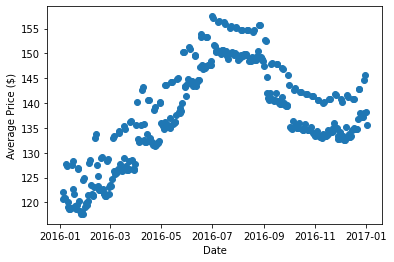

In [60]:
dates = da.date2num(sorted(seattle_cal.groupby('available').get_group('t')['date_obj'].unique()));
plt.xlabel("Date")
plt.ylabel("Average Price ($)")
plt.plot_date(dates, date_and_ava);

It looks like the cheapest time of the year to visit Seattle is around September and November.
<br /> Q3) Are people willing to pay a cleaning fee for a cleaner place to stay?

In [61]:
#square feet and review
fee_review_full = seattle_lis.dropna(subset=['cleaning_fee'], how='any')
fee_review_full = fee_review_full.dropna(subset=['review_scores_cleanliness'], how='any')


<Figure size 432x288 with 0 Axes>

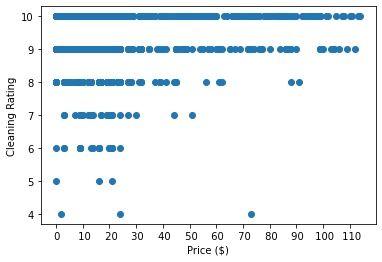

In [62]:
x = fee_review_full['cleaning_fee']
y = fee_review_full['review_scores_cleanliness']
# plt.locator_params(axis='x', nbins=2)
# plt.xlabel("Price ($)")
# plt.ylabel("Cleaning Rating")
plt.clf()
fig, ax = plt.subplots()
ax.xaxis.set_major_locator(MultipleLocator(10))
ax.xaxis.set_major_formatter(FormatStrFormatter('% 1.0f'))
ax.set_xlabel("Price ($)")
ax.set_ylabel("Cleaning Rating")
plt.scatter(x, y);

From This graph we can see that listings with higher cleaning fees tend to be cleaner, but fees higher than $50 don't mean cleaner listings. 